<div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 40px; margin-top: 0;">
    <div style="flex: 0 0 auto; margin-left: 0; margin-bottom: 0;margin-top: 0;">
        <img src="./pics/WIFIRE_LOGO_Transparent_s_0.png" alt="WiFire Logo" style="width: 179px; margin-bottom: 0px;">
    </div>    
    <div style="flex: 0 0 auto; margin-left: auto; margin-bottom: 0; margin-top: 0;">
        <img src="./pics/logo_UCSD.png" alt="UCSD Logo" style="width: 179px; margin-bottom: 0px; margin-top: 20px;">
    </div>
    <div style="flex: 0 0 auto; margin-left: auto; margin-bottom: 0; margin-top: 20px;">
        <img src="./pics/sdsclogo-plusname-horiz-red.jpg" alt="San Diego Supercomputer Center Logo" width="300"/>
    </div>
</div>

<h1 style="text-align: center; font-size: 24px; margin-top: 0;">NSF National Data Platform (NDP)</h1>
<h3 style="text-align: center; font-size: 18px; margin-top: 10px;"> Physics Guided Machine Learning Project at WIFIRE Lab</h3>

<div style="margin: 20px 0;">
    <p>The <a href="https://wifire.ucsd.edu">WIFIRE Lab</a> is a consortium of UC San Diego organizations and a number of partnerships including the university collaborators, industry partners, fire departments, and state agencies. To meet growing needs in hazard monitoring and response, the WIFIRE Lab is an all-hazards knowledge cyberinfrastructure and a management layer from the data collection to modeling efforts.</p>
    <p>Next-generation fire models provide the basis to understand fire physics in detail, leading the way for emulators to model potential fire behavior. The <b>Physics Guided Machine Learning (PGML)</b> project uses data from hundreds of coupled fire-atmosphere simulations produced by a physics-based coupled fire-atmospheric modeling model (QUIC-Fire) to develop a reduced-order emulator. Such an emulator can be used to predict the wildfire spread, which can help the fire agencies take necessary steps to reduce the damage. Additionally, the predictions can be utilized to mitigate the risk of controlled fires escalating into wildfires.</p>
    <p>This dataset was generated particularly for the Physics Guided Machine Learning (PGML) research and educational tasks. It is an ensemble of prescribed fire simulations generated by the QUIC-Fire coupled fire-atmospheric modeling tool. Each simulation run is represented by a Zarr file, containing the outputs created by QUIC-Fire through the BurnPro3D web interface. To model a burn, users upload the polygon for their burn unit and BurnPro3D uses a 3D fuels model for that location created by FastFuels and an ignition file with a user-defined ignition pattern created in DripTorch. Those files are included here as well. In addition, users define the environmental conditions they would like to model in terms of fuel moisture, wind direction, and wind speed.</p>
</div>

<center>
    <div style="text-align: right; padding: 5px;">
        <p style="text-align: right;"><strong>Contact:</strong> San Diego Supercomputer Center, University of California San Diego (<a href="mailto:saleem.alharir@utah.edu">segurvich@ucsd.edu</a>)</p>
    </div>
</center>


<div style="display: flex; align-items: center; justify-content: flex-start; margin-top: 20px; border-top: 1px solid #ccc; padding-top: 20px;">
    <img src="https://new.nsf.gov/themes/custom/nsf_theme/components/images/logo/logo-desktop.svg" alt="NSF Logo" style="width: 120px; margin-right: 10px;">
    <p style="font-size: 12px;">The National Data Platform was funded by NSF 2333609 under CI, CISE Research Resources programs. Any opinions, findings, conclusions, or recommendations expressed in this material are those of the author(s) and do not necessarily reflect the views of the funders.</p>
</div>

<hr>

## Physics Guided Machine Learning
### Uniform Fuels Idealized Grass Dataset
### Exploratory Data Analysis

#### Imports

In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
import zarr

#### Load Data

In [2]:
runs_df = pd.read_csv('uniform-pgml-success_list_simulation_runs.csv')
runs_df.head(3)

,wind_speed,wind_direction,surface_moisture,ignition_type_metadata,run_id,link
0,1.0,230,0.05,Ignite_Aerial.dat,80aa1808-adc0-42c1-88e5-abfe3cfc5c41,https://wifire-data.sdsc.edu/data/burnpro3d/d/...
1,1.0,230,0.05,Ignite_LongFireline_Outwards.dat,d7a29471-89ef-4372-a39f-16f3f306edde,https://wifire-data.sdsc.edu/data/burnpro3d/d/...
2,1.0,230,0.05,Ignite_Strip_Southwards.dat,85a4e12f-3016-4531-a062-fe5e6dca07eb,https://wifire-data.sdsc.edu/data/burnpro3d/d/...


#### Explore how the data look like

In [3]:
# select one simulation run
link = runs_df.loc[0]['link']

# load data from remote location
run_zarr = zarr.open(link)

# select Fuel Density feature
fuels_dens = np.array(run_zarr['fuels-dens'])

# show how the very last 'frame' looks like
fuels_dens[-1]

array([[[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
        [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
        ...,
        [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
        [0. , 0.7, 0.7, ..., 0.7, 0.7, 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ]]], dtype=float16)

#### Vizualize few frames from the first run

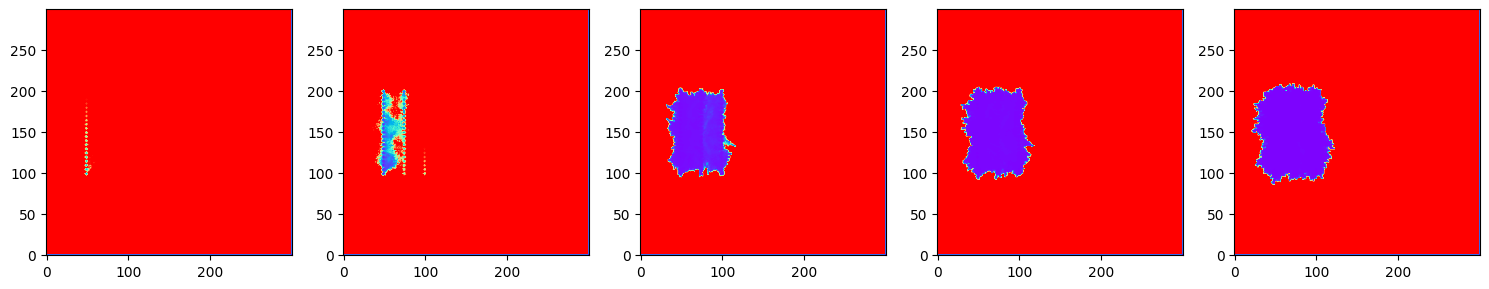

In [4]:
fig, axs = plt.subplots(1, 5,figsize=(15,15))
times=[20,50,150,300,600]
for i, ax in enumerate(axs.flatten()):
    ax.imshow(fuels_dens[times[i],0,:,:],cmap='rainbow',origin="lower")
fig.tight_layout()
plt.show()

#### Ensemble info

Let's explore what input features each simulation run has and their unique values:

In [5]:
# input features
runs_df.columns

Index(['wind_speed', 'wind_direction', 'surface_moisture',
       'ignition_type_metadata', 'run_id', 'link'],
      dtype='object')

In [6]:
# wind speeds
runs_df['wind_speed'].unique()

array([ 1. ,  2. ,  3. ,  5. ,  7.5, 10. , 15. ])

In [7]:
# wind directions
runs_df['wind_direction'].unique()

array([230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330])

In [8]:
# surface moisture
runs_df['surface_moisture'].unique()

array([0.05, 0.1 , 0.15])

In [9]:
# ignition types
runs_df['ignition_type_metadata'].unique()

array(['Ignite_Aerial.dat', 'Ignite_LongFireline_Outwards.dat',
       'Ignite_Strip_Southwards.dat', 'Ignite_LongFireline_Inwards.dat',
       'Ignite_Strip_Northwards.dat'], dtype=object)

In [10]:
# overall how many simulation runs
len(runs_df)

1155

#### Compare Simulation Runs

Let's explore how the outputs for different simulation runs look like and how they are different based on input parameters. For example, the simulation run with low initial wind speed will be different from similar simulation run with higher wind speed.

In [11]:
# make a simple list of links
runs_list = list(runs_df['link'])
runs_list[:3]

['https://wifire-data.sdsc.edu/data/burnpro3d/d/80/aa/run_80aa1808-adc0-42c1-88e5-abfe3cfc5c41/quicfire.zarr',
 'https://wifire-data.sdsc.edu/data/burnpro3d/d/d7/a2/run_d7a29471-89ef-4372-a39f-16f3f306edde/quicfire.zarr',
 'https://wifire-data.sdsc.edu/data/burnpro3d/d/85/a4/run_85a4e12f-3016-4531-a062-fe5e6dca07eb/quicfire.zarr']

In [12]:
# function to produce a set of plots
def plot_runs(feature_to_plot):
    wind_s = runs_df["wind_speed"]
    wind_d = runs_df["wind_direction"]
    surface_m = runs_df["surface_moisture"]
    ignition_t = runs_df["ignition_type_metadata"]
    
    # select just a few samples (simulation runs) to visualize
    run_samples = [0,50,250,300,450,600,750,1153]
    for run_number in run_samples:
        link = runs_list[run_number]
        run_zarr = zarr.open(link)
        fuels_dens = np.array(run_zarr[feature_to_plot])
        fig, axs = plt.subplots(1, 5,figsize=(15,15))
        
        # select just a few samples (frames) to visualize 
        times=[20,50,150,300,600]
        print("Input Parameters:\nWind Speed:",wind_s[run_number],"Wind Direction:",wind_d[run_number],"Surface Moisture:",surface_m[run_number],"Ignition:",ignition_t[run_number],"\n") 
    
        for i, ax in enumerate(axs.flatten()):
            ax.set_title(f"Run #: {run_number}, Time step: t={times[i]}")
            ax.imshow(fuels_dens[times[i],0,:,:],cmap='rainbow',origin="lower")
        fig.tight_layout()
        plt.show()

##### Input parameters vs fuel moisture

Input Parameters:
Wind Speed: 1.0 Wind Direction: 230 Surface Moisture: 0.05 Ignition: Ignite_Aerial.dat 



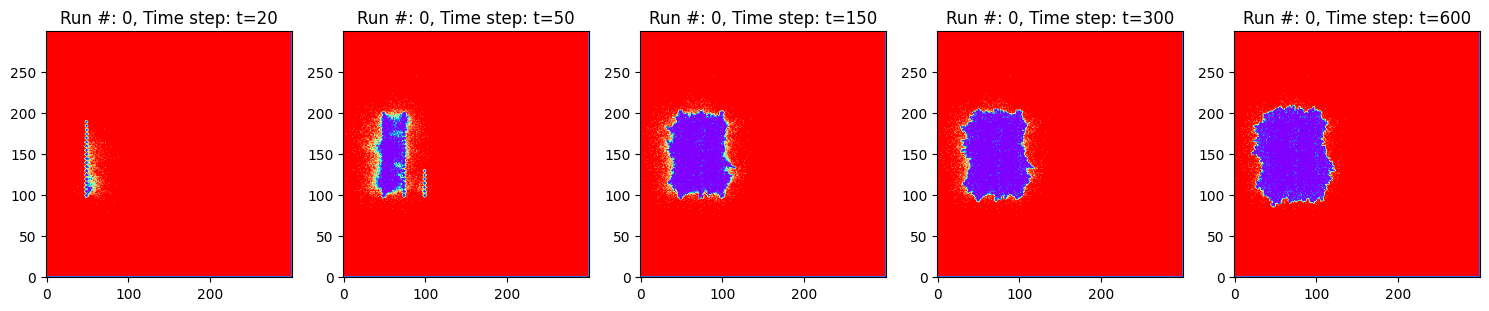

Input Parameters:
Wind Speed: 1.0 Wind Direction: 260 Surface Moisture: 0.1 Ignition: Ignite_Aerial.dat 



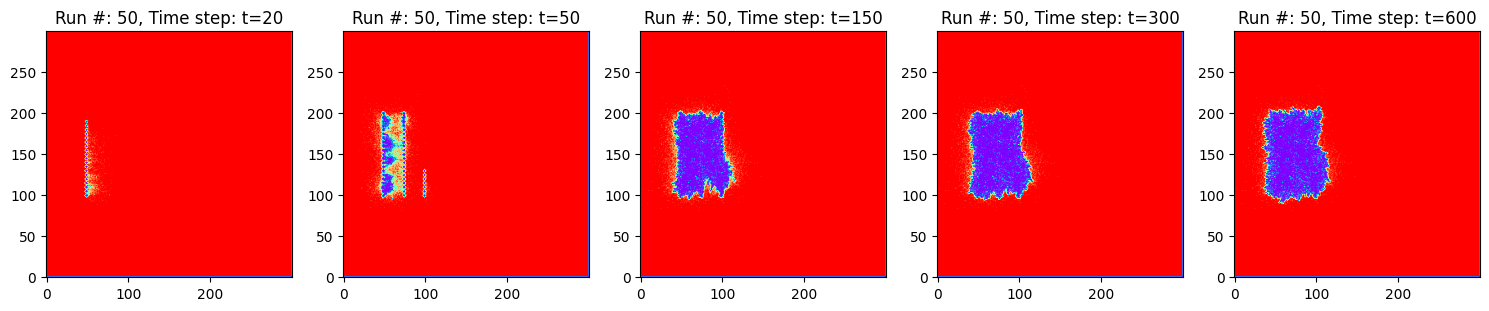

Input Parameters:
Wind Speed: 2.0 Wind Direction: 280 Surface Moisture: 0.15 Ignition: Ignite_Aerial.dat 



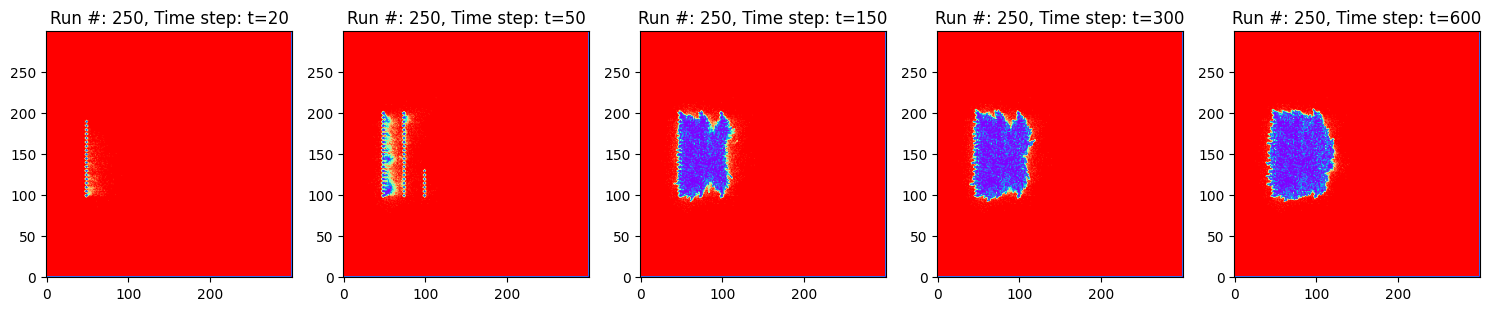

Input Parameters:
Wind Speed: 2.0 Wind Direction: 320 Surface Moisture: 0.05 Ignition: Ignite_Aerial.dat 



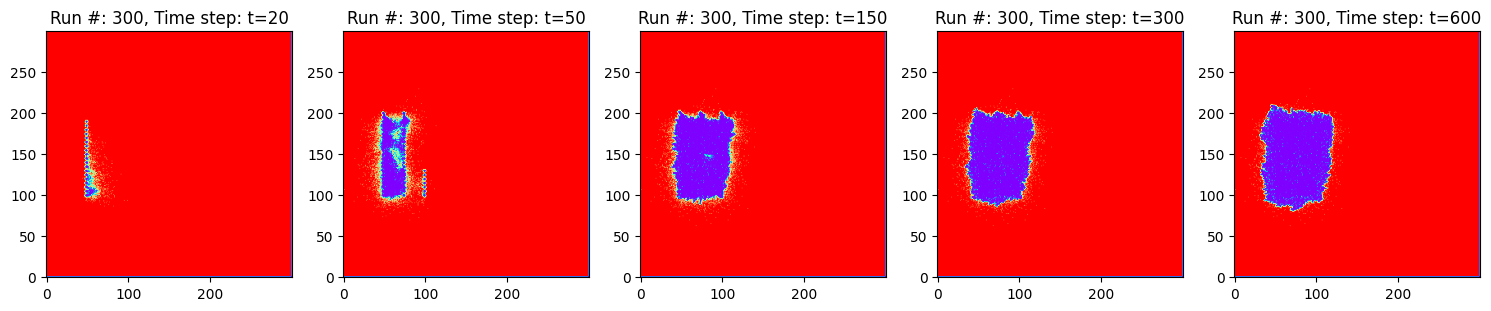

Input Parameters:
Wind Speed: 3.0 Wind Direction: 310 Surface Moisture: 0.05 Ignition: Ignite_Aerial.dat 



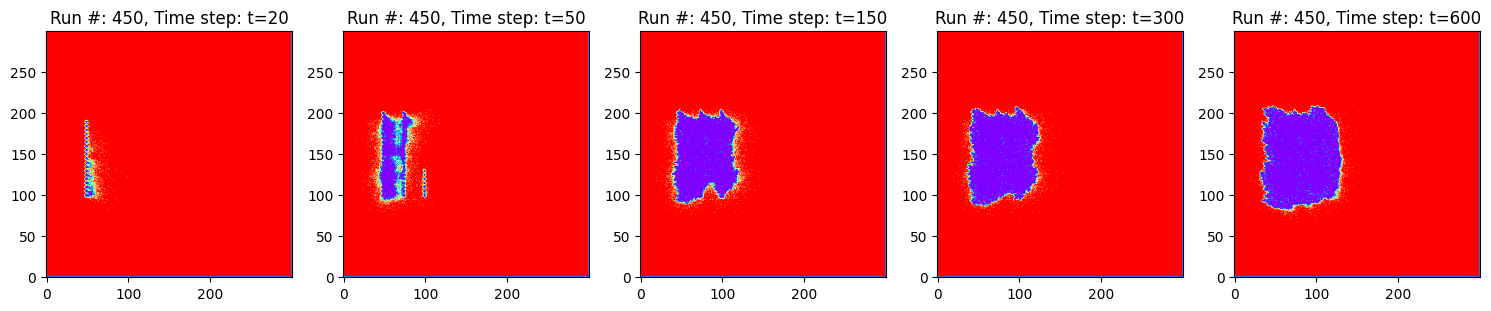

Input Parameters:
Wind Speed: 5.0 Wind Direction: 300 Surface Moisture: 0.05 Ignition: Ignite_Aerial.dat 



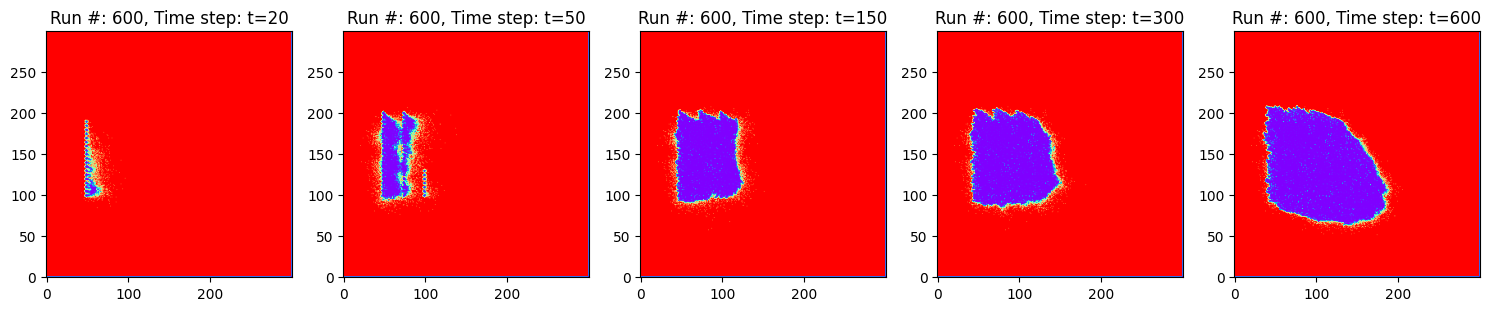

Input Parameters:
Wind Speed: 7.5 Wind Direction: 290 Surface Moisture: 0.05 Ignition: Ignite_Aerial.dat 



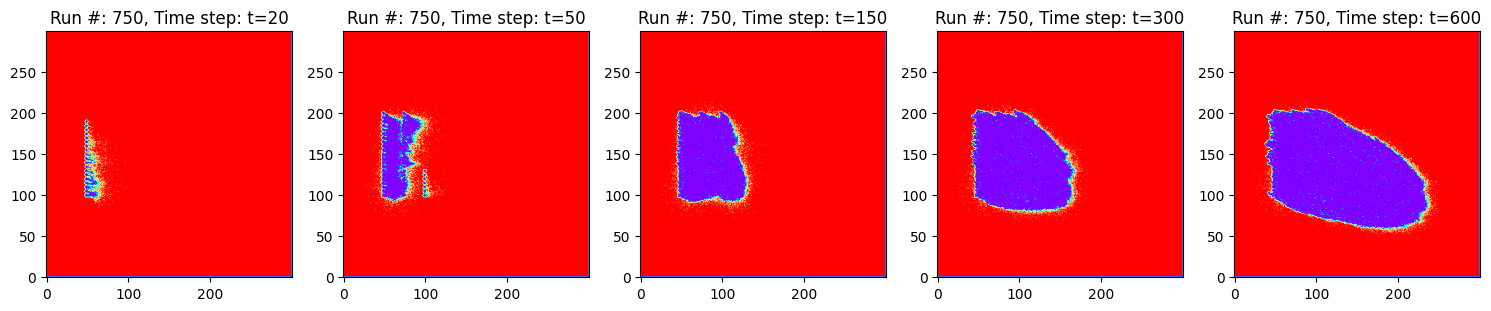

Input Parameters:
Wind Speed: 15.0 Wind Direction: 330 Surface Moisture: 0.15 Ignition: Ignite_LongFireline_Inwards.dat 



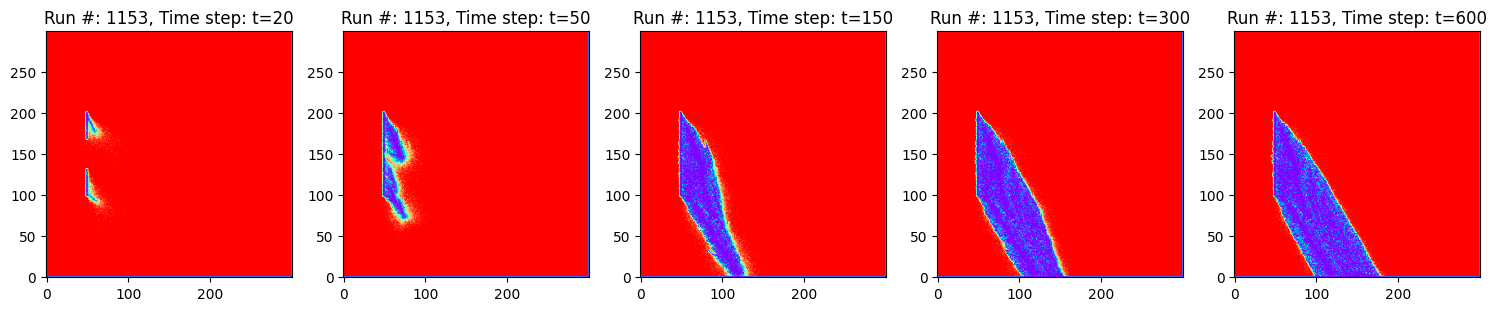

In [13]:
%matplotlib inline
# make plots for Fuel Moisture feature
plot_runs('fuels-moist')

##### Input parameters vs fuel density

Input Parameters:
Wind Speed: 1.0 Wind Direction: 230 Surface Moisture: 0.05 Ignition: Ignite_Aerial.dat 



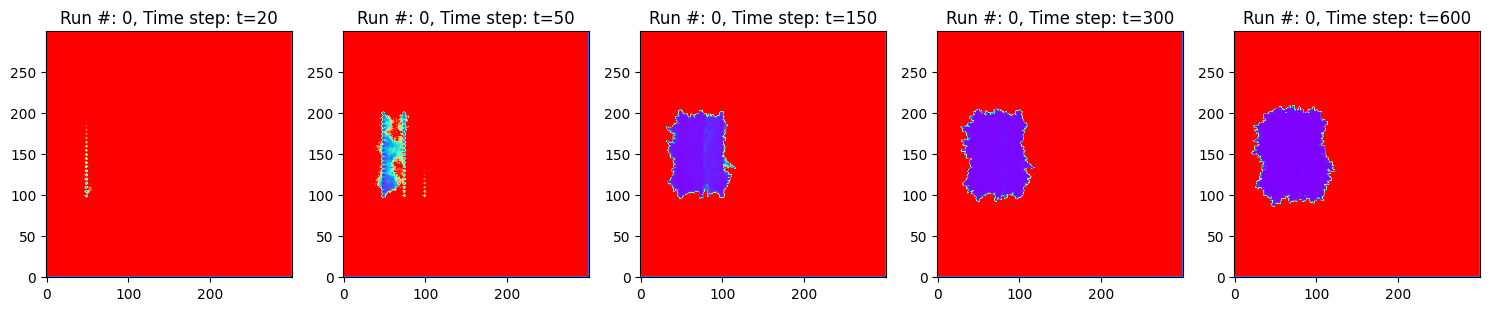

Input Parameters:
Wind Speed: 1.0 Wind Direction: 260 Surface Moisture: 0.1 Ignition: Ignite_Aerial.dat 



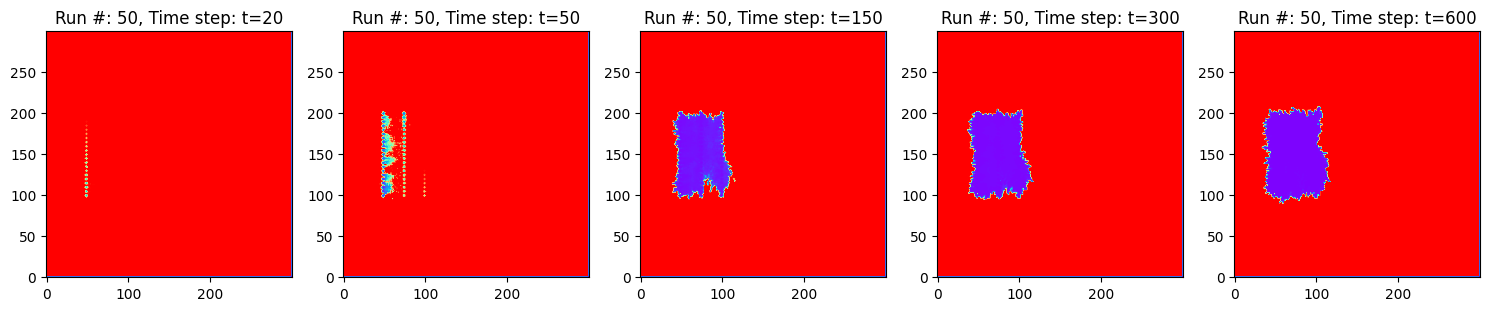

Input Parameters:
Wind Speed: 2.0 Wind Direction: 280 Surface Moisture: 0.15 Ignition: Ignite_Aerial.dat 



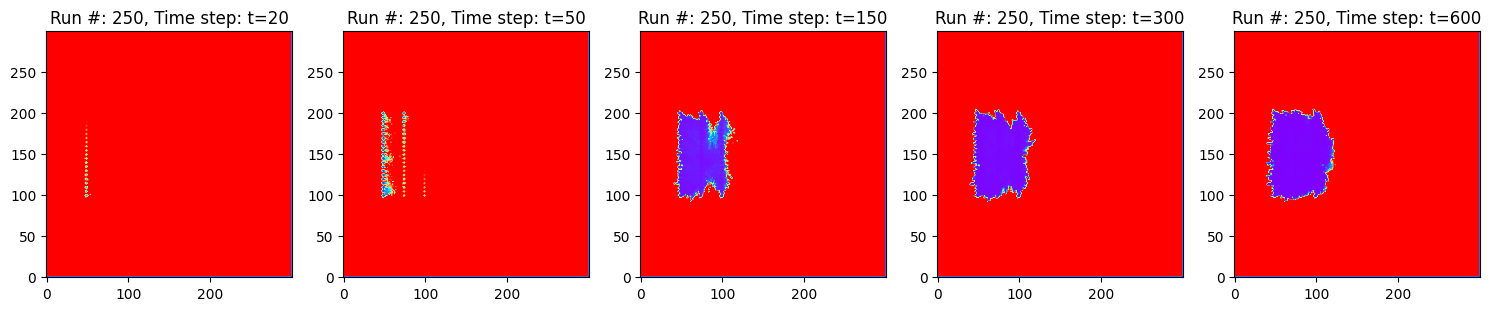

Input Parameters:
Wind Speed: 2.0 Wind Direction: 320 Surface Moisture: 0.05 Ignition: Ignite_Aerial.dat 



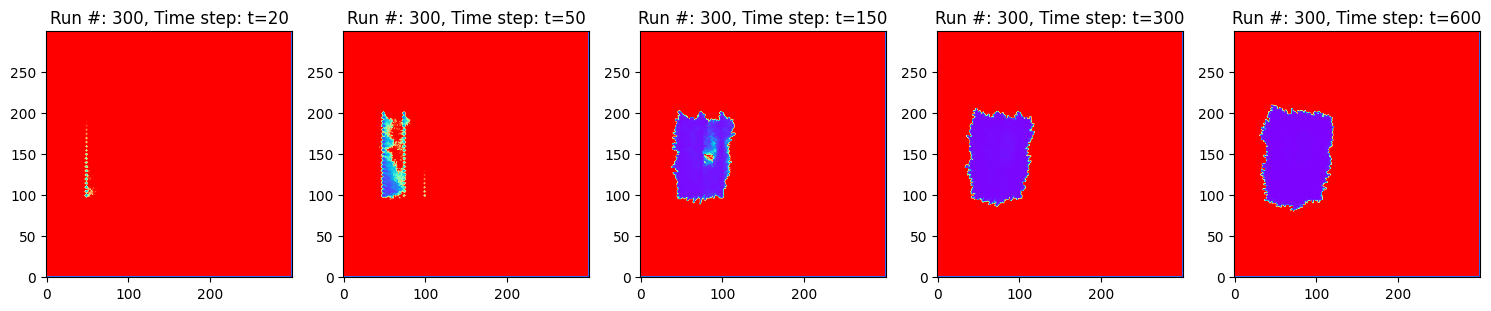

Input Parameters:
Wind Speed: 3.0 Wind Direction: 310 Surface Moisture: 0.05 Ignition: Ignite_Aerial.dat 



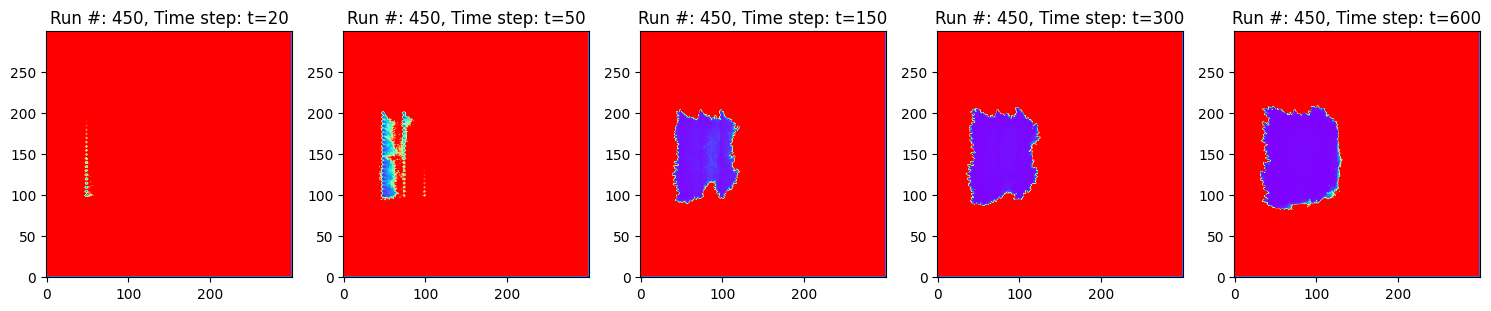

Input Parameters:
Wind Speed: 5.0 Wind Direction: 300 Surface Moisture: 0.05 Ignition: Ignite_Aerial.dat 



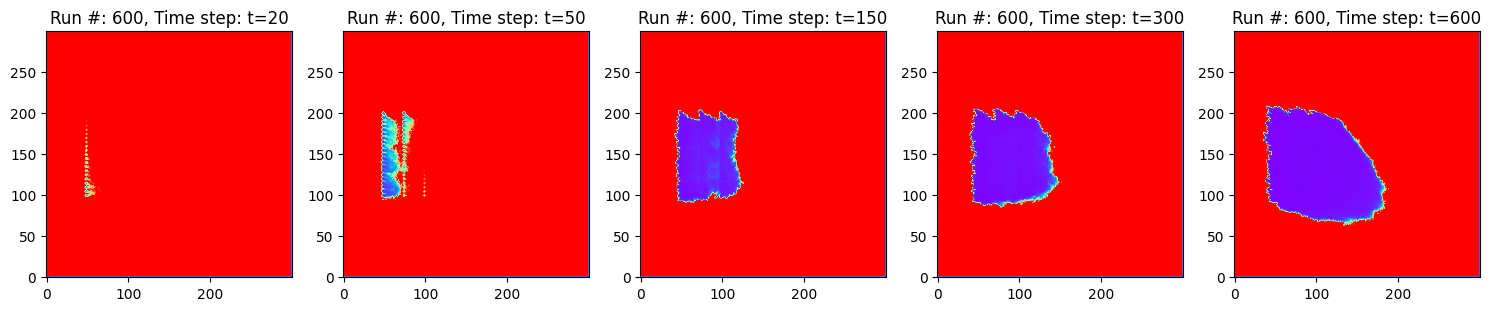

Input Parameters:
Wind Speed: 7.5 Wind Direction: 290 Surface Moisture: 0.05 Ignition: Ignite_Aerial.dat 



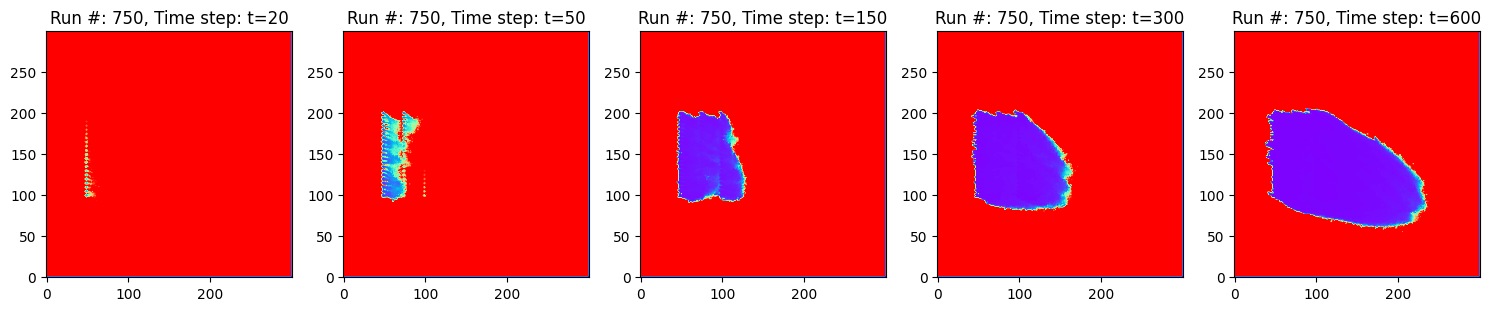

Input Parameters:
Wind Speed: 15.0 Wind Direction: 330 Surface Moisture: 0.15 Ignition: Ignite_LongFireline_Inwards.dat 



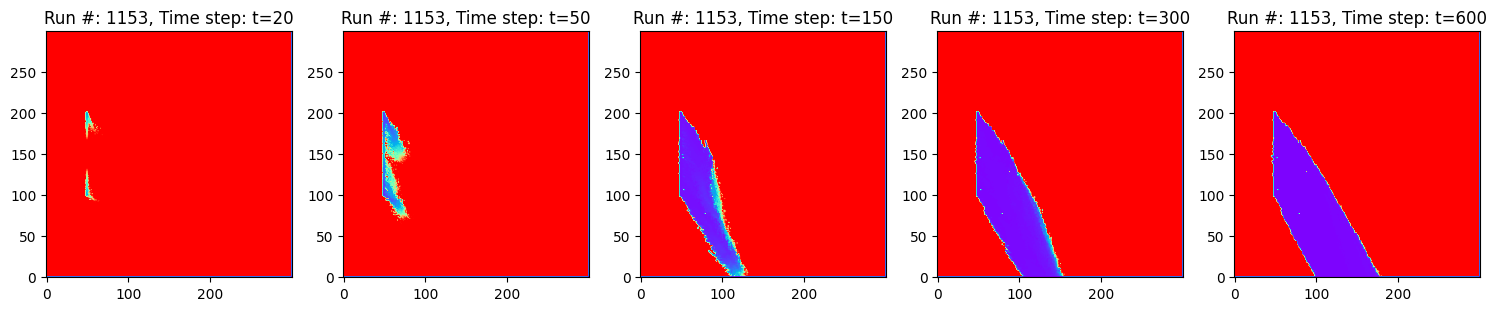

In [14]:
%matplotlib inline
# make plots for Fuel Density feature
plot_runs('fuels-dens')